In [1]:
import pandas as pd
import numpy as np
import sys, os
import matplotlib.pyplot as plt
from IPython.display import display
from geopy.geocoders import Nominatim
from pymongo import MongoClient

In [2]:
place = input ("Enter Address :") 
print(place)

Enter Address :536 Garrison Ct SW Concord NC 28025
536 Garrison Ct SW Concord NC 28025


In [3]:
#place = "408 Brook Pine Trl, apex"
geolocator = Nominatim(user_agent="Test")
location = geolocator.geocode(place) 
print(location)

536, Garrison Court Southwest, Concord, Cabarrus County, North Carolina, 28025, United States


In [4]:
print((location.latitude, location.longitude))

(35.37009533738403, -80.58423806729385)


In [5]:
  # Declare all variables as strings. Spaces must be replaced with '+', i.e., change 'John Smith' to 'John+Smith'.
  # Define the lat, long of the location and the year
  #lat, lon, year = 33.2164, -97.1292, 2018
  lat, lon =  location.latitude, location.longitude
  # You must request an NSRDB api key from the link above
  api_key = '5qyFRrBVjEZIGuR0WEcihqCEcg4LV8DbErgE6rze'
  # Set the attributes to extract (e.g., dhi, ghi, etc.), separated by commas.
  attributes = 'ghi,dhi,dni,wind_speed,air_temperature,solar_zenith_angle'
  #attributes = 'ghi'
  # Choose year of data
  year = '2018'
  # Set leap year to true or false. True will return leap day data if present, false will not.
  leap_year = 'false'
  # Set time interval in minutes, i.e., '30' is half hour intervals. Valid intervals are 30 & 60.
  interval = '60'
  # Specify Coordinated Universal Time (UTC), 'true' will use UTC, 'false' will use the local time zone of the data.
  # NOTE: In order to use the NSRDB data in SAM, you must specify UTC as 'false'. SAM requires the data to be in the
  # local time zone.
  utc = 'false'
  # Your full name, use '+' instead of spaces.
  your_name = 'Anthony+N'
  # Your reason for using the NSRDB.
  reason_for_use = 'testing'
  # Your affiliation
  your_affiliation = 'ECU'
  # Your email address
  your_email = 'natalea20@students.ecu.edu'
  # Please join our mailing list so we can keep you up-to-date on new developments.
  mailing_list = 'false'

  # Declare url string
  url = 'https://developer.nrel.gov/api/solar/nsrdb_psm3_download.csv?wkt=POINT({lon}%20{lat})&names={year}&leap_day={leap}&interval={interval}&utc={utc}&full_name={name}&email={email}&affiliation={affiliation}&mailing_list={mailing_list}&reason={reason}&api_key={api}&attributes={attr}'.format(year=year, lat=lat, lon=lon, leap=leap_year, interval=interval, utc=utc, name=your_name, email=your_email, mailing_list=mailing_list, affiliation=your_affiliation, reason=reason_for_use, api=api_key, attr=attributes)
  # Return just the first 2 lines to get metadata:
  info = pd.read_csv(url, nrows=1)
  # See metadata for specified properties, e.g., timezone and elevation
  timezone, elevation = info['Local Time Zone'], info['Elevation']
  
  df = pd.read_csv(url, nrows=2)
    

In [6]:
# View metadata
info

,Source,Location ID,City,State,Country,Latitude,Longitude,Time Zone,Elevation,Local Time Zone,...,Cloud Type 11,Cloud Type 12,Fill Flag 0,Fill Flag 1,Fill Flag 2,Fill Flag 3,Fill Flag 4,Fill Flag 5,Surface Albedo Units,Version
0,NSRDB,1051442,-,-,-,35.37,-80.58,-5,200,-5,...,Dust,Smoke,NaN,Missing Image,Low Irradiance,Exceeds Clearsky,Missing CLoud Properties,Rayleigh Violation,NaN,3.1.0


In [7]:
df = pd.read_csv(url, skiprows=2)
df.head()

,Year,Month,Day,Hour,Minute,GHI,DHI,DNI,Wind Speed,Temperature,Solar Zenith Angle
0,2018,1,1,0,30,0,0,0,2.1,-5.5,167.61
1,2018,1,1,1,30,0,0,0,2.4,-5.7,161.36
2,2018,1,1,2,30,0,0,0,2.7,-5.8,150.38
3,2018,1,1,3,30,0,0,0,2.8,-6.1,138.35
4,2018,1,1,4,30,0,0,0,2.8,-6.5,126.13


In [8]:
# Set the time index in the pandas dataframe:
df = df.set_index(pd.date_range('1/1/{yr}'.format(yr=year), freq=interval+'Min', periods=525600/int(interval)))

# take a look
df.shape

(8760, 11)

In [9]:
df.head()

,Year,Month,Day,Hour,Minute,GHI,DHI,DNI,Wind Speed,Temperature,Solar Zenith Angle
2018-01-01 00:00:00,2018,1,1,0,30,0,0,0,2.1,-5.5,167.61
2018-01-01 01:00:00,2018,1,1,1,30,0,0,0,2.4,-5.7,161.36
2018-01-01 02:00:00,2018,1,1,2,30,0,0,0,2.7,-5.8,150.38
2018-01-01 03:00:00,2018,1,1,3,30,0,0,0,2.8,-6.1,138.35
2018-01-01 04:00:00,2018,1,1,4,30,0,0,0,2.8,-6.5,126.13


In [10]:
# Print column names
df.columns.values

array(['Year', 'Month', 'Day', 'Hour', 'Minute', 'GHI', 'DHI', 'DNI',
       'Wind Speed', 'Temperature', 'Solar Zenith Angle'], dtype=object)

# Visualize the GHI Data for the Year

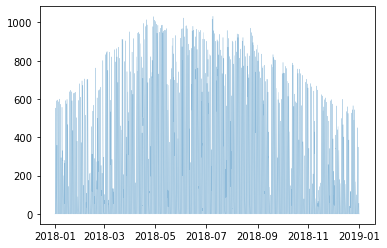

In [11]:
plt.plot(df.index, df['GHI'], alpha = 0.5, linewidth=.3)
plt.show()

As you can see, there are many ups and downs - these correspond to the time of day. Naturally, GHI is far lower during the night. The beginning and end of this graph is the evening and the center is when the sun is highest.

Text(0.5, 1.0, 'Subset Plot')

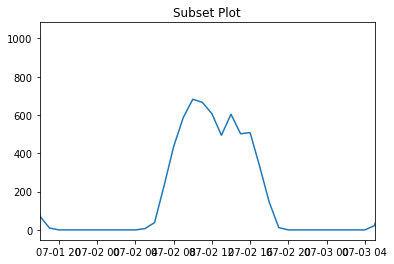

In [12]:
zoomedin = plt.subplot()
zoomedin.margins(x=-0.498)
zoomedin.plot(df.index, df['GHI'])
zoomedin.set_title('Subset Plot')

# Now, Let's Run a Linear Regression Algorithm on the Data

In [13]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV, cross_val_score, KFold, cross_val_predict

In [15]:
from sklearn.model_selection import train_test_split

In [19]:
date_time = df.index.reshape(-1,1)
ghi = df['GHI'].reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(date_time, ghi, test_size=0.33)
k = 10

AttributeError: 'DatetimeIndex' object has no attribute 'reshape'

In [18]:
model = LinearRegression()
prediction = cross_val_predict(model, X_train, y_train, cv=k)
prediction.head()

ValueError: Expected 2D array, got 1D array instead:
array=['2018-10-14T00:00:00.000000000' '2018-03-02T01:00:00.000000000'
 '2018-04-13T16:00:00.000000000' ... '2018-05-15T00:00:00.000000000'
 '2018-10-23T12:00:00.000000000' '2018-07-11T02:00:00.000000000'].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
df.to_csv("sample.csv")

In [ ]:
# Connect to MongoDB
client =  MongoClient("mongodb://localhost:27017/?readPreference=primary&appname=MongoDB%20Compass&ssl=false")

In [ ]:
db = client['Solar']
collection = db['Local']

In [ ]:
df.reset_index(inplace=True)
data_dict = df.to_dict("records")

In [ ]:
# Insert collection
collection.insert_many(data_dict)